In [3]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer




Import the data using pandas

In [4]:
reviews_df = pd.read_csv("IMDB Dataset.csv")
reviews_df.shape

(50000, 2)

View the data

In [5]:
reviews_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


sentiment column should be changed from "positive" or "negative" to 0 (negative) or 1 (positive) 

In [6]:
reviews_df['sentiment'] = reviews_df['sentiment'].replace({'positive':1, 'negative':0})
reviews_df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
reviews_df.isnull().sum()

review       0
sentiment    0
dtype: int64

No null entries so no removing null data required.

HTML tags must be removed, as you can see from the output below, review at index 1 no longer has br tags.

In [8]:
def remove_html_tags(review):
    return re.sub("<.*?>", "", review)

reviews_df["review"] = reviews_df["review"].apply(remove_html_tags)
reviews_df.head()
    

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [12]:
from nltk import word_tokenize
nltk.download('punkt')
def tokenize(review):
    return word_tokenize(review)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hal0d\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0    [One, of, the, other, reviewers, has, mentione...
1    [A, wonderful, little, production, ., The, fil...
2    [I, thought, this, was, a, wonderful, way, to,...
3    [Basically, there, 's, a, family, where, a, li...
4    [Petter, Mattei, 's, ``, Love, in, the, Time, ...
Name: review, dtype: object

In [170]:
nltk.download("stopwords")
def remove_stopwords(review):
    return [word for word in review if word not in set(stopwords.words("english"))]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [One, reviewers, mentioned, watching, 1, Oz, e...
1    [A, wonderful, little, production, ., The, fil...
2    [I, thought, wonderful, way, spend, time, hot,...
3    [Basically, 's, family, little, boy, (, Jake, ...
4    [Petter, Mattei, 's, ``, Love, Time, Money, ''...
Name: review, dtype: object

In [13]:
ps = PorterStemmer()
def stem(review):
    return [ps.stem(word) for word in review]


0    [one, of, the, other, review, ha, mention, tha...
1    [a, wonder, littl, product, ., the, film, tech...
2    [i, thought, thi, wa, a, wonder, way, to, spen...
3    [basic, there, 's, a, famili, where, a, littl,...
4    [petter, mattei, 's, ``, love, in, the, time, ...
Name: review, dtype: object

In [17]:
nltk.download("wordnet")
nltk.download("omw-1.4")
lm = WordNetLemmatizer()
def lem(review):
    return [lm.lemmatize(word) for word in review]



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hal0d\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hal0d\AppData\Roaming\nltk_data...


0    [one, of, the, other, review, ha, mention, tha...
1    [a, wonder, littl, product, ., the, film, tech...
2    [i, thought, thi, wa, a, wonder, way, to, spen...
3    [basic, there, 's, a, famili, where, a, littl,...
4    [petter, mattei, 's, ``, love, in, the, time, ...
Name: review, dtype: object

In [26]:
#Spacy Lemming
import spacy
#Load spacy model and disable features which arent required for lemmatization
lem_model = spacy.load("en_core_web_sm", disable=["parser","ner"])

def spacy_lem(review):
    review = lem_model(review)
    return " ".join([token.lemma_ for token in review])



0    one of the other reviewer have mention that af...
1    a wonderful little production . the filming te...
2    I think this be a wonderful way to spend time ...
3    basically there be a family where a little boy...
4    Petter Mattei 's " love in the Time of money "...
Name: review, dtype: object

In [172]:
def join(review):
    return " ".join(review)

reviews_df["review"] = reviews_df["review"].apply(join)
reviews_df["review"].head()

0    one review mention watch 1 oz episod 'll hook ...
1    a wonder littl product . the film techniqu una...
2    i thought wonder way spend time hot summer wee...
3    basic 's famili littl boy ( jake ) think 's zo...
4    petter mattei 's `` love time money '' visual ...
Name: review, dtype: object

In [173]:
#nltk.download("stopwords")
ps = PorterStemmer()
lm = WordNetLemmatizer()
from nltk import word_tokenize
def preprocess(review):
    review = word_tokenize(review)
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = [lm.lemmatize(word) for word in review]
    return review


In [9]:
corpus = reviews_df["review"]
corpus

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
tv = CountVectorizer(ngram_range=(1,3))
X = tv.fit_transform(corpus)

Y = reviews_df["sentiment"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

mnb = MultinomialNB()
svm = SVC(kernel="linear")
lr = LogisticRegression(max_iter=800)


mnb.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=800)

In [13]:
predMnb = mnb.predict(X_test)
predLr = lr.predict(X_test)
predSvm = svm.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
def predictions(name, pred):
    print("################################")
    print(name)
    print("Accuracy:")
    print(accuracy_score(Y_test , pred))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test , pred))
    print("Classification Report:")
    print(classification_report(Y_test , pred))
    print("################################")
    print()
predictions("Multinomial Naive Bayes", predMnb)
predictions("Logistical Regression", predLr)
predictions("Support Vector Machine", predSvm)


################################
Multinomial Naive Bayes
Accuracy:
0.8963
Confusion Matrix:
[[4597  447]
 [ 590 4366]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5044
           1       0.91      0.88      0.89      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

################################

################################
Logistical Regression
Accuracy:
0.9115
Confusion Matrix:
[[4549  495]
 [ 390 4566]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5044
           1       0.90      0.92      0.91      4956

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

##############################

<AxesSubplot:>

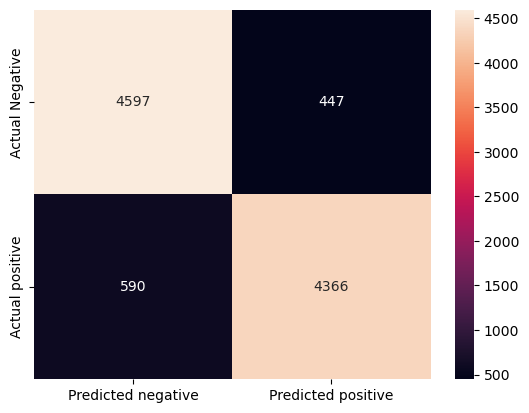

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,predMnb), annot=True, fmt=".4g", xticklabels=["Predicted negative", "Predicted positive"], yticklabels=["Actual Negative", "Actual positive"])


<AxesSubplot:>

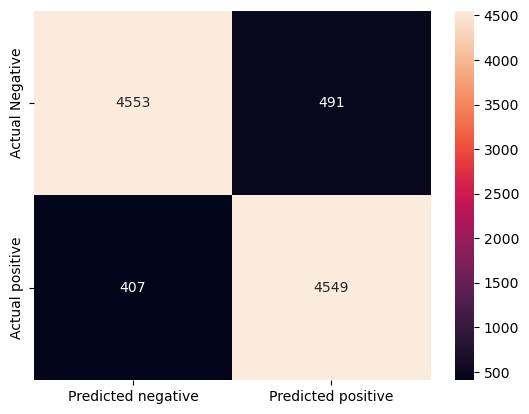

In [17]:
sns.heatmap(confusion_matrix(Y_test,predSvm), annot=True, fmt=".4g", xticklabels=["Predicted negative", "Predicted positive"], yticklabels=["Actual Negative", "Actual positive"])


<AxesSubplot:>

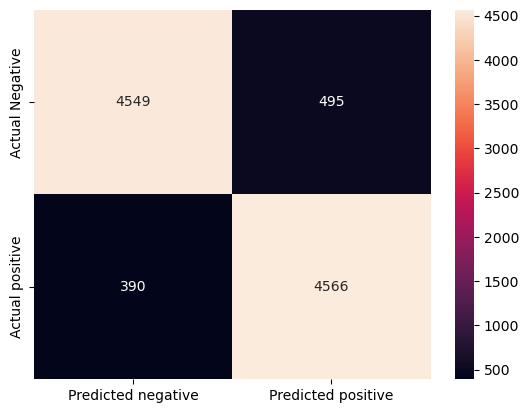

In [18]:
sns.heatmap(confusion_matrix(Y_test,predLr), annot=True, fmt=".4g", xticklabels=["Predicted negative", "Predicted positive"], yticklabels=["Actual Negative", "Actual positive"])